In [535]:
import pandas as pd

In [536]:
%matplotlib inline

##Read CSV

In [537]:
cereal = pd.read_csv('cereals.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75


In [538]:
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67


##Find missing values signified by -1

In [539]:
missing = cereal[cereal==-1].dropna(how='all')

In [540]:
missing.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN


These are the missing values we need to extrapolate.

In [541]:
cereal_missing = cereal.iloc[[4, 20, 57], :]

In [542]:
cereal_missing.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
4,Almond_Delight,R,C,110,2,2,200,1.0,14,8,-1,25,3,1,0.75
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21,0,-1,0,2,1,1.00
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,-1,-1,110,0,1,1,0.67


##Add column that denotes servings per 100 cal

In [543]:
cereal['servings_per_100'] = cereal.calories / 100

In [544]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,0.7
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00,1.2
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50,0.5
4,Almond_Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,1.1


##Adjust nutrient columns to reflect nutrient value per 100 calories

In [545]:
columns_to_adj = ["protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins", "weight", "cups"]
for column in columns_to_adj:
    cereal[column] = (cereal[column]/cereal['servings_per_100'])

In [546]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,-0.909091,22.727273,3,0.909091,0.681818,1.1


In [547]:
cereal_missing.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
4,Almond_Delight,R,C,110,2,2,200,1.0,14,8,-1,25,3,1,0.75
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21,0,-1,0,2,1,1.00
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,-1,-1,110,0,1,1,0.67


##Run correlation on complete data to discover potential for regression to fill missing values.

In [548]:
cereal_for_correlation = cereal[(cereal.index != 4) & (cereal.index !=20) & (cereal.index != 57)]

In [549]:
cereal_for_correlation.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5
5,Apple_Cinnamon_Cheerios,G,C,110,1.818182,1.818182,163.636364,1.363636,9.545455,9.090909,63.636364,22.727273,1,0.909091,0.681818,1.1


In [550]:
corr_values = cereal_for_correlation.corr()

In [551]:
corr_values.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
calories,1.000000,-0.467516,0.389123,0.008597,-0.458661,-0.440627,0.396192,-0.405256,0.055955,0.089243,-0.620566,-0.529376,1.000000
protein,-0.467516,1.000000,0.006963,0.129147,0.744912,0.074886,-0.435319,0.762235,0.087757,0.179871,0.677646,0.013026,-0.467516
fat,0.389123,0.006963,1.000000,-0.040377,-0.036153,-0.595913,0.198498,0.056994,-0.084498,0.253832,-0.278369,-0.397158,0.389123
sodium,0.008597,0.129147,-0.040377,1.000000,0.210301,0.045053,-0.064925,0.194228,0.366039,-0.103897,0.204080,-0.125703,0.008597
fiber,-0.458661,0.744912,-0.036153,0.210301,1.000000,-0.076862,-0.183027,0.963040,0.118354,0.235076,0.899909,-0.111043,-0.458661


##Potassium and Fiber highly correlated.  Use regression to fill potassium values.  Sugar correlated to carbs, but for missing value don't have either sugar or carbs.

In [552]:
corr_values[(corr_values>=.7) | (corr_values<=-.7)] 

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
calories,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
protein,NaN,1.000000,NaN,NaN,0.744912,NaN,NaN,0.762235,NaN,NaN,NaN,NaN,NaN
fat,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiber,NaN,0.744912,NaN,NaN,1.000000,NaN,NaN,0.963040,NaN,NaN,0.899909,NaN,NaN
carbo,NaN,NaN,NaN,NaN,NaN,1.000000,-0.808153,NaN,NaN,NaN,NaN,NaN,NaN
sugars,NaN,NaN,NaN,NaN,NaN,-0.808153,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
potass,NaN,0.762235,NaN,NaN,0.963040,NaN,NaN,1.000000,NaN,NaN,0.872909,NaN,NaN
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [553]:
pot = cereal_for_correlation.potass.to_frame()
pot.shape

(74, 1)

In [554]:
fiber = cereal_for_correlation.fiber.to_frame()
fiber.shape

(74, 1)

In [555]:
from sklearn.linear_model import LinearRegression

In [556]:
lr = LinearRegression()

In [557]:
lr.fit(fiber, pot)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##Predict Potassium based on Fiber and fill missing values

In [558]:
lr.predict(1)

array([[ 65.84859938]])

In [559]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,-0.909091,22.727273,3,0.909091,0.681818,1.1


In [560]:
cereal.loc[4,"potass"]= 66

In [561]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1


#Find mean to fill missing values for carbs and sugars.

In [562]:
cereal_for_correlation.carbo.mean()

14.09505378255378

In [563]:
cereal_for_correlation.sugars.mean()

6.3707053082053076

In [564]:
cereal.loc[57, 'carbo'] = 14

In [565]:
cereal.loc[57, 'sugars'] = 6

In [566]:
cereal.loc[57, 'sugars']

6.0

In [567]:
cereal.loc[57, :]

name                Quaker_Oatmeal
mfr                              Q
type                             H
calories                       100
protein                          5
fat                              2
sodium                           0
fiber                          2.7
carbo                           14
sugars                           6
potass                         110
vitamins                         0
shelf                            1
weight                           1
cups                          0.67
servings_per_100                 1
Name: 57, dtype: object

In [568]:
from sklearn.cluster import KMeans

In [569]:
from sklearn import preprocessing

In [570]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'servings_per_100'],
      dtype='object')

##Create df for KMeans, dropping columns not useful.

In [571]:
cereal_for_kmeans = cereal.loc[:, ['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']]

In [572]:
cereal_names = cereal.loc[:,"name"]

In [573]:
cereal_names.head()

0                    100%_Bran
1            100%_Natural_Bran
2                     All-Bran
3    All-Bran_with_Extra_Fiber
4               Almond_Delight
Name: name, dtype: object

In [574]:
cereal_for_kmeans

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,1.428571,0.471429
1,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,0.833333,0.833333
2,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,1.428571,0.471429
3,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,2.000000,1.000000
4,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,0.909091,0.681818
5,110,1.818182,1.818182,163.636364,1.363636,9.545455,9.090909,63.636364,22.727273,0.909091,0.681818
6,110,1.818182,0.000000,113.636364,0.909091,10.000000,12.727273,27.272727,22.727273,0.909091,0.909091
7,130,2.307692,1.538462,161.538462,1.538462,13.846154,6.153846,76.923077,19.230769,1.023077,0.576923
8,90,2.222222,1.111111,222.222222,4.444444,16.666667,6.666667,138.888889,27.777778,1.111111,0.744444
9,90,3.333333,0.000000,233.333333,5.555556,14.444444,5.555556,211.111111,27.777778,1.111111,0.744444


#Scale data before running KMeans

In [575]:
cereal_scaled = preprocessing.scale(cereal_for_kmeans)

##Run KMeans for 3, 4, 5, 6 clusters.

In [576]:
kmeans = KMeans(5)
kmeans.fit(cereal_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [577]:
clusters = kmeans.predict(cereal_scaled)

In [578]:
clusters

array([2, 0, 2, 2, 0, 0, 3, 0, 4, 4, 3, 4, 0, 0, 3, 4, 4, 3, 3, 0, 1, 4, 3,
       4, 3, 3, 1, 0, 3, 3, 3, 3, 4, 4, 0, 3, 3, 3, 4, 3, 4, 0, 3, 1, 0, 0,
       0, 4, 3, 0, 4, 0, 0, 4, 1, 1, 0, 0, 0, 0, 1, 4, 4, 1, 1, 1, 3, 4, 1,
       4, 3, 4, 4, 3, 4, 4, 3], dtype=int32)

In [579]:
cereal["five_groups"] = clusters

In [580]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7,2
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2,0
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7,2
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5,2
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1,0


In [581]:
k_means4 = KMeans(4)

In [582]:
k_means4.fit(cereal_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [583]:
clusters4 = k_means4.predict(cereal_scaled)

In [584]:
cereal['four_groups'] = clusters4

In [585]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7,2,1
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2,0,0
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7,2,1
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5,2,1
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1,0,0


In [586]:
km3 = KMeans(3)
km3.fit(cereal_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [587]:
clusters3 = km3.predict(cereal_scaled)

In [588]:
clusters3

array([1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2], dtype=int32)

In [589]:
cereal['three_groups'] = clusters3

In [590]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7,2,1,1
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2,0,0,2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7,2,1,1
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5,2,1,1
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1,0,0,2


In [591]:
km6 = KMeans(6)

In [592]:
km6.fit(cereal_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [593]:
six_groups = km6.predict(cereal_scaled)

In [594]:
cereal['six_groups'] = six_groups

In [595]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7,2,1,1,2
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2,0,0,2,0
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7,2,1,1,2
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5,2,1,1,2
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1,0,0,2,0


In [596]:
cereal.sort(['five_groups', 'name'])

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2,0,0,2,0
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1,0,0,2,0
5,Apple_Cinnamon_Cheerios,G,C,110,1.818182,1.818182,163.636364,1.363636,9.545455,9.090909,63.636364,22.727273,1,0.909091,0.681818,1.1,0,0,2,1
7,Basic_4,G,C,130,2.307692,1.538462,161.538462,1.538462,13.846154,6.153846,76.923077,19.230769,3,1.023077,0.576923,1.3,0,0,2,0
12,Cinnamon_Toast_Crunch,G,C,120,0.833333,2.500000,175.000000,0.000000,10.833333,7.500000,37.500000,20.833333,2,0.833333,0.625000,1.2,0,0,2,0
13,Clusters,G,C,110,2.727273,1.818182,127.272727,1.818182,11.818182,6.363636,95.454545,22.727273,3,0.909091,0.454545,1.1,0,0,2,0
19,Cracklin'_Oat_Bran,K,C,110,2.727273,2.727273,127.272727,3.636364,9.090909,6.363636,145.454545,22.727273,3,0.909091,0.454545,1.1,0,0,2,0
27,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",P,C,120,2.500000,1.666667,133.333333,4.166667,10.000000,8.333333,166.666667,20.833333,3,1.041667,0.558333,1.2,0,0,2,0
34,Great_Grains_Pecan,P,C,120,2.500000,2.500000,62.500000,2.500000,10.833333,3.333333,83.333333,20.833333,3,0.833333,0.275000,1.2,0,0,2,0
41,Life,Q,C,100,4.000000,2.000000,150.000000,2.000000,12.000000,6.000000,95.000000,25.000000,2,1.000000,0.670000,1.0,0,0,2,0


In [597]:
cereal.groupby('six_groups').count()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups
six_groups,,,,,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [598]:
cereal.groupby('five_groups').count()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,four_groups,three_groups,six_groups
five_groups,,,,,,,,,,,,,,,,,,,
0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
4,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [599]:
cereal.groupby('four_groups').count()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,three_groups,six_groups
four_groups,,,,,,,,,,,,,,,,,,,
0,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [600]:
cereal.groupby('three_groups').count()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,six_groups
three_groups,,,,,,,,,,,,,,,,,,,
0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [601]:
groups_3 = cereal.groupby('three_groups').count()

In [602]:
group_2 = cereal[cereal['five_groups'] == 2]

#Grouping in 5 Clusters.
After grouping in 3, 4, 5 and 6 clusters, we will proceed with five clusters.  Two clusters seem very strongly related, so versions of them show up in almost all of the clustering attemps.  Let's look at those first.

##Group 1 -  Fiber or bust!

In [603]:
group_2.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,3,1.428571,0.471429,0.7,2,1,1,2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,3,1.428571,0.471429,0.7,2,1,1,2
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,1.000000,0.5,2,1,1,2


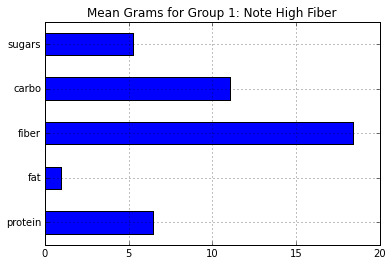

In [604]:
group_2_plot_B.mean(0).plot(kind = 'barh', title="Mean Grams for Group 1: Note High Fiber")

When classified in clusters of 3, 4, 5, and 6, these cereals are so similar that they always get their own cluster.

In [605]:
group_4 = cereal[cereal['five_groups'] == 4]

##Group 2 - Low added sugar, mostly carbs.  Basic rice or wheat cereals.

In [606]:
group_4.head(8)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
8,Bran_Chex,R,C,90,2.222222,1.111111,222.222222,4.444444,16.666667,6.666667,138.888889,27.777778,1,1.111111,0.744444,0.9,4,3,0,4
9,Bran_Flakes,P,C,90,3.333333,0.000000,233.333333,5.555556,14.444444,5.555556,211.111111,27.777778,3,1.111111,0.744444,0.9,4,3,0,4
11,Cheerios,G,C,110,5.454545,1.818182,263.636364,1.818182,15.454545,0.909091,95.454545,22.727273,1,0.909091,1.136364,1.1,4,3,0,4
15,Corn_Chex,R,C,110,1.818182,0.000000,254.545455,0.000000,20.000000,2.727273,22.727273,22.727273,1,0.909091,0.909091,1.1,4,3,0,4
16,Corn_Flakes,K,C,100,2.000000,0.000000,290.000000,1.000000,21.000000,2.000000,35.000000,25.000000,1,1.000000,1.000000,1.0,4,3,0,4
21,Crispix,K,C,110,1.818182,0.000000,200.000000,0.909091,19.090909,2.727273,27.272727,22.727273,3,0.909091,0.909091,1.1,4,3,0,4
23,Double_Chex,R,C,100,2.000000,0.000000,190.000000,1.000000,18.000000,5.000000,80.000000,25.000000,3,1.000000,0.750000,1.0,4,3,0,4
32,Grape_Nuts_Flakes,P,C,100,3.000000,1.000000,140.000000,3.000000,15.000000,5.000000,85.000000,25.000000,3,1.000000,0.880000,1.0,4,3,0,4


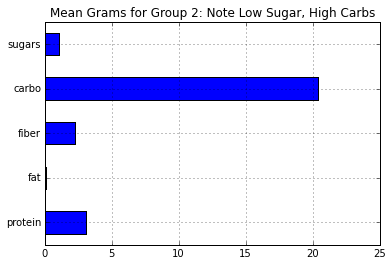

In [607]:
group_4_plot_B.mean(0).plot(kind = 'barh', title="Mean Grams for Group 2: Note Low Sugar, High Carbs")

These 8 cereals are almost always classified together.

Since there are 2 groups that are almost always together, grouping into 5 sets makes some sense.  Let's look at the other groups if we group into 5 clusters. 

##Group 3 -- Basic Sweetened Grain Cereals.
Similar to the group above, but with some added sugar.

In [608]:
group_0 = cereal[cereal['five_groups'] == 0]
group_0

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,3,0.833333,0.833333,1.2,0,0,2,0
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,3,0.909091,0.681818,1.1,0,0,2,0
5,Apple_Cinnamon_Cheerios,G,C,110,1.818182,1.818182,163.636364,1.363636,9.545455,9.090909,63.636364,22.727273,1,0.909091,0.681818,1.1,0,0,2,1
7,Basic_4,G,C,130,2.307692,1.538462,161.538462,1.538462,13.846154,6.153846,76.923077,19.230769,3,1.023077,0.576923,1.3,0,0,2,0
12,Cinnamon_Toast_Crunch,G,C,120,0.833333,2.500000,175.000000,0.000000,10.833333,7.500000,37.500000,20.833333,2,0.833333,0.625000,1.2,0,0,2,0
13,Clusters,G,C,110,2.727273,1.818182,127.272727,1.818182,11.818182,6.363636,95.454545,22.727273,3,0.909091,0.454545,1.1,0,0,2,0
19,Cracklin'_Oat_Bran,K,C,110,2.727273,2.727273,127.272727,3.636364,9.090909,6.363636,145.454545,22.727273,3,0.909091,0.454545,1.1,0,0,2,0
27,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",P,C,120,2.500000,1.666667,133.333333,4.166667,10.000000,8.333333,166.666667,20.833333,3,1.041667,0.558333,1.2,0,0,2,0
34,Great_Grains_Pecan,P,C,120,2.500000,2.500000,62.500000,2.500000,10.833333,3.333333,83.333333,20.833333,3,0.833333,0.275000,1.2,0,0,2,0
41,Life,Q,C,100,4.000000,2.000000,150.000000,2.000000,12.000000,6.000000,95.000000,25.000000,2,1.000000,0.670000,1.0,0,0,2,0


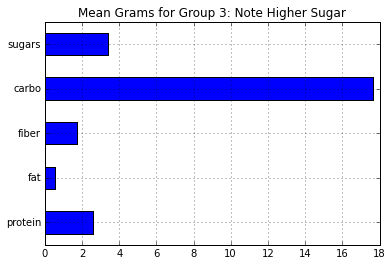

In [609]:
group_0_plot_B.mean(0).plot(kind = 'barh', title="Mean Grams for Group 3: Note Higher Sugar")

##Group 4 - Saturday Morning Cartoons.
Tons of added sugar.  Drink the milk after you eat these for an extra sugar rush.

In [610]:
group_1 = cereal[cereal['five_groups'] == 1]
group_1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
20,Cream_of_Wheat_(Quick),N,H,100,3.000000,0,80.000000,1.000000,21.000000,0.000000,-1.000000,0.000000,2,1.000000,1.000000,1.0,1,2,0,3
26,Frosted_Mini-Wheats,K,C,100,3.000000,0,0.000000,3.000000,14.000000,7.000000,100.000000,25.000000,2,1.000000,0.800000,1.0,1,2,0,3
43,Maypo,A,H,100,4.000000,1,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,2,1.000000,1.000000,1.0,1,2,0,3
54,Puffed_Rice,Q,C,50,2.000000,0,0.000000,0.000000,26.000000,0.000000,30.000000,0.000000,3,1.000000,2.000000,0.5,1,2,0,3
55,Puffed_Wheat,Q,C,50,4.000000,0,0.000000,2.000000,20.000000,0.000000,100.000000,0.000000,3,1.000000,2.000000,0.5,1,2,0,3
60,Raisin_Squares,K,C,90,2.222222,0,0.000000,2.222222,16.666667,6.666667,122.222222,27.777778,3,1.111111,0.555556,0.9,1,2,0,3
63,Shredded_Wheat,N,C,80,2.500000,0,0.000000,3.750000,20.000000,0.000000,118.750000,0.000000,1,1.037500,1.250000,0.8,1,2,0,3
64,Shredded_Wheat_'n'Bran,N,C,90,3.333333,0,0.000000,4.444444,21.111111,0.000000,155.555556,0.000000,1,1.111111,0.744444,0.9,1,2,0,3
65,Shredded_Wheat_spoon_size,N,C,90,3.333333,0,0.000000,3.333333,22.222222,0.000000,133.333333,0.000000,1,1.111111,0.744444,0.9,1,2,0,3
68,Strawberry_Fruit_Wheats,N,C,90,2.222222,0,16.666667,3.333333,16.666667,5.555556,100.000000,27.777778,2,1.111111,1.111111,0.9,1,2,0,3


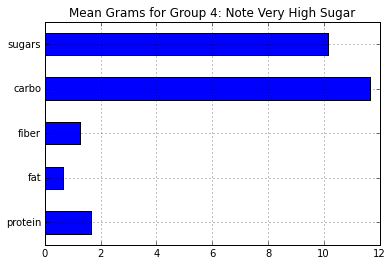

In [611]:
group_1_plot_B.mean(0).plot(kind = 'barh', title="Mean Grams for Group 4: Note Very High Sugar")

##Group 5: 'Healthier' Cereals
Most of these are sweetened but have some dried fruit or nuts added.  Some unexpected ones slip through, like Cinnamon Toast Crunch and Apple Cinnamon Cheerios

In [612]:
group_3 = cereal[cereal['five_groups'] == 3]
group_3

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,five_groups,four_groups,three_groups,six_groups
6,Apple_Jacks,K,C,110,1.818182,0.000000,113.636364,0.909091,10.000000,12.727273,27.272727,22.727273,2,0.909091,0.909091,1.1,3,0,2,1
10,Cap'n'Crunch,Q,C,120,0.833333,1.666667,183.333333,0.000000,10.000000,10.000000,29.166667,20.833333,2,0.833333,0.625000,1.2,3,0,2,1
14,Cocoa_Puffs,G,C,110,0.909091,0.909091,163.636364,0.000000,10.909091,11.818182,50.000000,22.727273,2,0.909091,0.909091,1.1,3,0,2,1
17,Corn_Pops,K,C,110,0.909091,0.000000,81.818182,0.909091,11.818182,10.909091,18.181818,22.727273,2,0.909091,0.909091,1.1,3,0,2,1
18,Count_Chocula,G,C,110,0.909091,0.909091,163.636364,0.000000,10.909091,11.818182,59.090909,22.727273,2,0.909091,0.909091,1.1,3,0,2,1
22,Crispy_Wheat_&_Raisins,G,C,100,2.000000,1.000000,140.000000,2.000000,11.000000,10.000000,120.000000,25.000000,3,1.000000,0.750000,1.0,3,0,2,1
24,Froot_Loops,K,C,110,1.818182,0.909091,113.636364,0.909091,10.000000,11.818182,27.272727,22.727273,2,0.909091,0.909091,1.1,3,0,2,1
25,Frosted_Flakes,K,C,110,0.909091,0.000000,181.818182,0.909091,12.727273,10.000000,22.727273,22.727273,1,0.909091,0.681818,1.1,3,0,2,1
28,Fruitful_Bran,K,C,120,2.500000,0.000000,200.000000,4.166667,11.666667,10.000000,158.333333,20.833333,3,1.108333,0.558333,1.2,3,0,2,1
29,Fruity_Pebbles,P,C,110,0.909091,0.909091,122.727273,0.000000,11.818182,10.909091,22.727273,22.727273,2,0.909091,0.681818,1.1,3,0,2,1


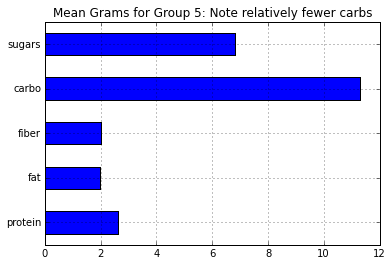

In [613]:
group_3_plot_B.mean(0).plot(kind = 'barh', title="Mean Grams for Group 5: Note relatively fewer carbs")

In [614]:
group_0_plot_A = group_0.loc[:, ['calories', 'sodium', 'potass', 'vitamins']]

##Other test plots

In [615]:
group_0_plot_B = group_0.loc[:, ['protein', 'fat', 'fiber', 'carbo', 'sugars']]

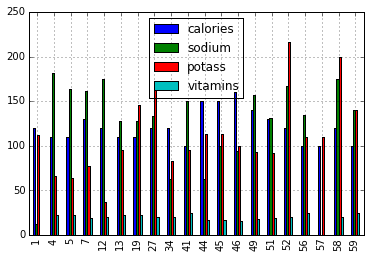

In [616]:
group_0_plot_A.plot(kind = 'bar')

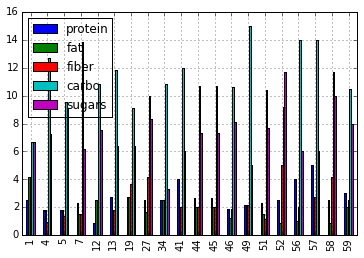

In [617]:
group_0_plot_B.plot(kind = 'bar')

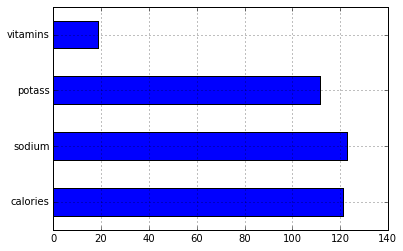

In [618]:
group_0_plot_A.mean(0).plot(kind = 'barh')

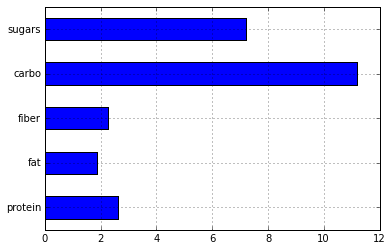

In [619]:
group_0_plot_B.mean(0).plot(kind = 'barh')

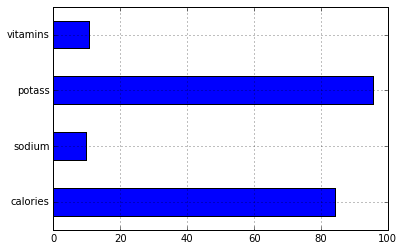

In [620]:
group_1_plot_A = group_1.loc[:, ['calories', 'sodium', 'potass', 'vitamins']]
group_1_plot_B = group_1.loc[:, ['protein', 'fat', 'fiber', 'carbo', 'sugars']]
group_1_plot_A.mean(0).plot(kind = 'barh')

    

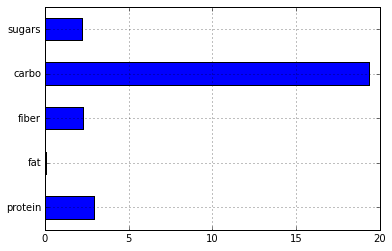

In [621]:
group_1_plot_B.mean(0).plot(kind = 'barh')

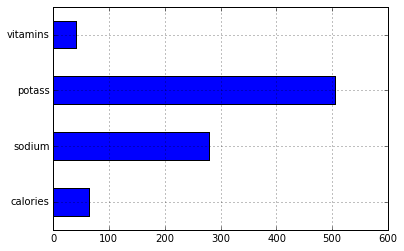

In [622]:
group_2_plot_A = group_2.loc[:, ['calories', 'sodium', 'potass', 'vitamins']]
group_2_plot_B = group_2.loc[:, ['protein', 'fat', 'fiber', 'carbo', 'sugars']]
group_2_plot_A.mean(0).plot(kind = 'barh')

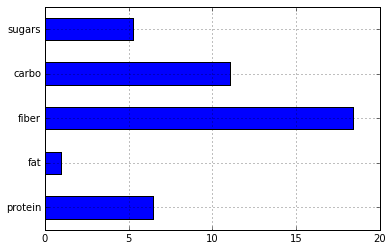

In [623]:
group_2_plot_B.mean(0).plot(kind = 'barh')

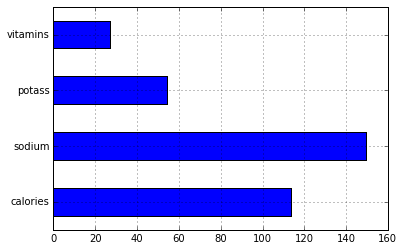

In [624]:
group_3_plot_A = group_3.loc[:, ['calories', 'sodium', 'potass', 'vitamins']]
group_3_plot_B = group_3.loc[:, ['protein', 'fat', 'fiber', 'carbo', 'sugars']]
group_3_plot_A.mean(0).plot(kind = 'barh')

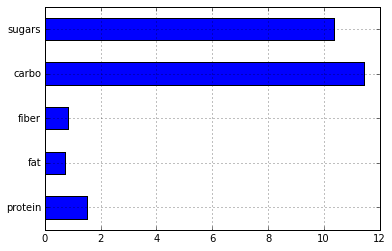

In [625]:
group_3_plot_B.mean(0).plot(kind = 'barh')

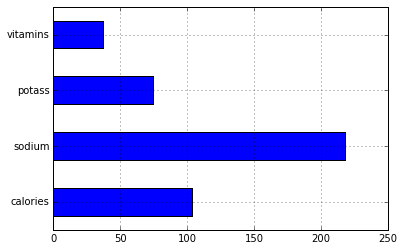

In [626]:
group_4_plot_A = group_4.loc[:, ['calories', 'sodium', 'potass', 'vitamins']]
group_4_plot_B = group_4.loc[:, ['protein', 'fat', 'fiber', 'carbo', 'sugars']]
group_4_plot_A.mean(0).plot(kind = 'barh')

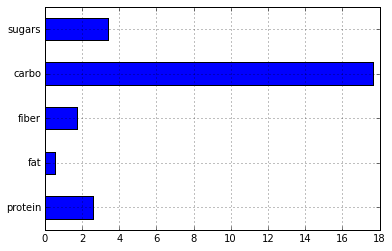

In [627]:
group_4_plot_B.mean(0).plot(kind = 'barh')